In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

### Введение в задачи регрессии

Модели регрессии - это модели, в которых предсказывается числовой (непрерывная переменная) результат

In [4]:
data = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/HRDataset.csv")
data.head()

,EmpID,Employee_Name,DOB,Gender,GenderID,MaritalDesc,MaritalStatusID,MarriedID,EmploymentStatus,EmpStatusID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,10026,"Adinolfi, Wilson K",07-10-1983,M,1,Single,0,0,Active,1,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,10084,"Ait Sidi, Karthikeyan",05-05-1975,M,1,Married,1,1,Voluntarily Terminated,5,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,10196,"Akinkuolie, Sarah",09/19/88,F,0,Married,1,1,Voluntarily Terminated,5,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,10088,"Alagbe,Trina",09/27/88,F,0,Married,1,1,Active,1,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,10069,"Anderson, Carol",09-08-1989,F,0,Divorced,2,0,Voluntarily Terminated,5,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [5]:
data.shape

(311, 36)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmpID                       311 non-null    int64  
 1   Employee_Name               311 non-null    object 
 2   DOB                         311 non-null    object 
 3   Gender                      311 non-null    object 
 4   GenderID                    311 non-null    int64  
 5   MaritalDesc                 311 non-null    object 
 6   MaritalStatusID             311 non-null    int64  
 7   MarriedID                   311 non-null    int64  
 8   EmploymentStatus            311 non-null    object 
 9   EmpStatusID                 311 non-null    int64  
 10  Department                  311 non-null    object 
 11  DeptID                      311 non-null    int64  
 12  PerfScoreID                 311 non-null    int64  
 13  FromDiversityJobFairID      311 non

Задача: построить модель предсказания числа отсутсвий на рабочем месте

### Очистка данных

In [23]:
data['HispanicLatino'] = data['HispanicLatino'].replace({'no': 'No', 'yes' : 'Yes'})

### Создание новых переменных

In [51]:
data['DOB'].head(30)

0     07-10-1983
1     05-05-1975
2       09/19/88
3       09/27/88
4     09-08-1989
5       05/22/77
6       05/24/79
7       02/18/83
8     02-11-1970
9     01-07-1988
10    01-12-1974
11      02/21/74
12    07-04-1988
13      07/20/83
14      07/15/77
15      10/18/81
16      04/17/66
17      10/27/70
18    04-04-1986
19    04-06-1979
20      12/22/70
21      12/27/58
22    09-01-1989
23      09/21/90
24      01/16/67
25      07/30/64
26    04-04-1987
27    03-10-1970
28      08/24/90
29      11/24/87
Name: DOB, dtype: object

In [60]:
datetime(1900,1,1)

AttributeError: module 'numpy' has no attribute 'datetime'

In [74]:
data['Age'] = 2024 - pd.to_datetime(data['DOB'], format = 'mixed', dayfirst = True).dt.year
data['Age'] = np.where(data['Age']<=0, 100 + data['Age'], data['Age'])
data['Experience'] = 2024 - pd.to_datetime(data['DateofHire'], format = 'mixed', dayfirst = True).dt.year

### Разведочный анализ данных

In [24]:
data['HispanicLatino'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
data['RaceDesc'].unique()

array(['White', 'Black or African American', 'Two or more races', 'Asian',
       'American Indian or Alaska Native', 'Hispanic'], dtype=object)

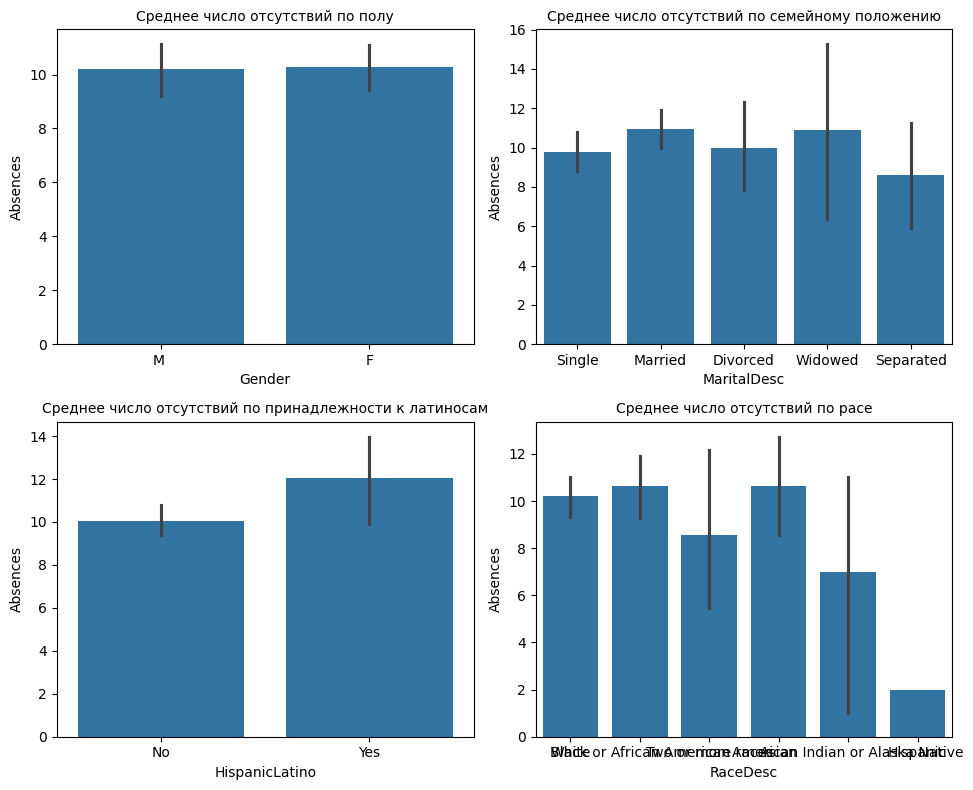

In [29]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.barplot(x = 'Gender', y = 'Absences', data = data, ax = ax[0,0])
ax[0,0].set_title('Среднее число отсутствий по полу', fontsize = 10)
sns.barplot(x = 'MaritalDesc', y = 'Absences', data = data, ax = ax[0, 1])
ax[0,1].set_title('Среднее число отсутствий по семейному положению', fontsize = 10)
sns.barplot(x = 'HispanicLatino', y = 'Absences', data = data, ax = ax[1, 0])
ax[1,0].set_title('Среднее число отсутствий по принадлежности к латиносам', fontsize = 10)
sns.barplot(x = 'RaceDesc', y = 'Absences', data = data, ax = ax[1,1])
ax[1,1].set_title('Среднее число отсутствий по расе', fontsize = 10)
plt.tight_layout()
plt.show()

Семейное положение, принадлежность к латино-американцам и раса могут быть хорошими переменными для предсказания количества отсутстувий на рабочем месте

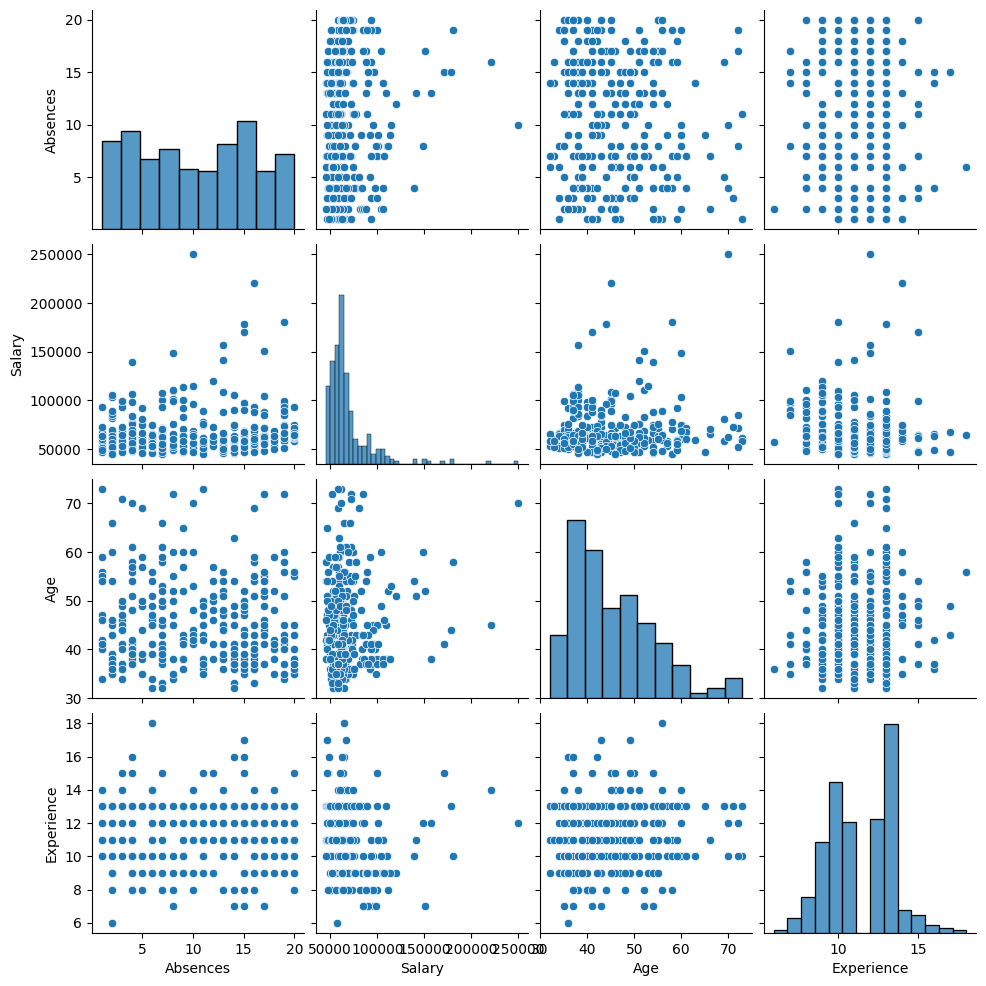

In [76]:
sns.pairplot(data[['Absences', 'Salary', 'Age', 'Experience']])

Очевидных закономерностей нет

Можно попробовать очистить от выбросов по заработной плате

### Переводим категориальные переменные в числовой формат (бинарные переменные)

In [77]:
cat_vars = ['Gender', 'MaritalDesc', 'HispanicLatino', 'RaceDesc']
num_vars = ['Salary', 'Age', 'Experience']
target_var = ['Absences']

### Готовим матрицу X и вектор y

In [78]:
X_dummies = pd.get_dummies(data[cat_vars], drop_first = True, dtype = int)
X_dummies.head()

,Gender_M,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,HispanicLatino_Yes,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White
0,1,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1


In [83]:
X = data[num_vars]
X = pd.merge(
    left = X,
    right = X_dummies,
    how = 'inner',
    left_index = True,
    right_index = True
)

y = data[target_var]

In [82]:
X

,Salary,Age,Experience,Gender_M,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,HispanicLatino_Yes,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White
0,62506,41,13,1,0,0,1,0,0,0,0,0,0,1
1,104437,49,9,1,1,0,0,0,0,0,0,0,0,1
2,64955,36,13,0,1,0,0,0,0,0,0,0,0,1
3,64991,36,16,0,1,0,0,0,0,0,0,0,0,1
4,50825,35,13,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,65893,39,10,1,0,0,1,0,0,0,0,0,0,1
307,48513,42,16,0,0,0,1,0,0,1,0,0,0,0
308,220450,45,14,0,0,0,1,0,0,0,0,0,0,1
309,89292,45,9,0,0,0,1,0,0,0,0,0,0,1


### Делим выборку на обучающую, тестовую и прогнозную

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [86]:
X_train.shape

(186, 14)

In [88]:
X_test.shape

(125, 14)

In [89]:
X_test, X_forecast, y_test, y_forecast = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [90]:
X_test.shape

(62, 14)

In [91]:
X_forecast.shape

(63, 14)

### Попробуем обучить модель 

#### Linear Regression (OLS)

In [92]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = ols.predict(X_test)

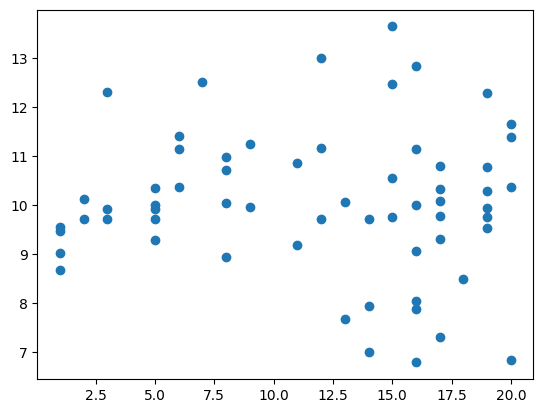

In [95]:
plt.scatter(y_test, y_pred)
plt.show()

Видим, что предсказанные значения Y далеки от фактических значений Y. В идеале мы должны получить все точки, лежащие на диагонали с углом 45 градусов

### Метрики качества модели регрессии

Используем 4 метрики: R2, MAE, MAPE, RMSE

R2 - чем выше, тем лучше

Остальные метрики - чем ниже, тем лучше

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print('R2', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 -0.15770075860215926
MAE 5.880134246663803
RMSE 6.529659751947986
MAPE 1.1599926454332796


Сравним точность модели линейной регрессии с простым предсказанием по среднему значению

In [105]:
y_pred = np.array([data[target_var].mean()[0]]*len(y_test))
print('R2', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 -0.0627440182795822
MAE 5.672077585312727
RMSE 6.256143867303826
MAPE 1.206118545468484


C:\Users\D\AppData\Local\Temp\ipykernel_8516\3201300609.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = np.array([data[target_var].mean()[0]]*len(y_test))


### Пробуем другие модели регрессии

#### SVM

In [106]:
from sklearn import svm
regr_svm = svm.SVR()
regr_svm.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

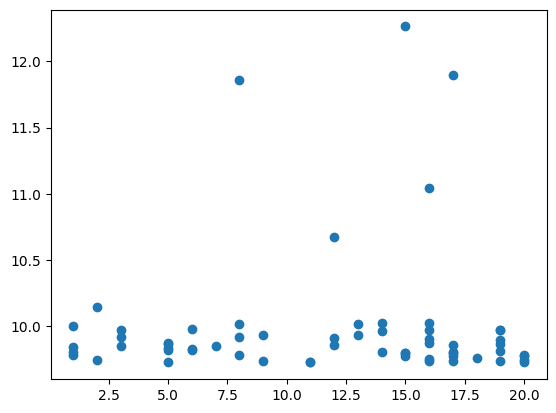

In [107]:
y_pred = regr_svm.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

In [108]:
print('R2', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 -0.08331449980886041
MAE 5.700322048191127
RMSE 6.316400666822006
MAPE 1.1697100554915656


#### SGD

In [109]:
from sklearn.linear_model import SGDRegressor
regr_sgd = SGDRegressor()
regr_sgd.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

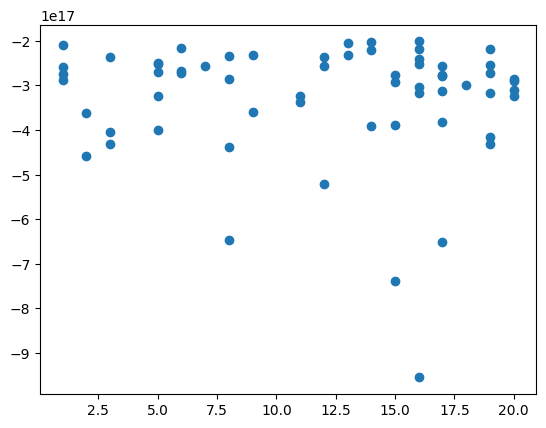

In [110]:
y_pred = regr_sgd.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

#### Decision Tree

In [111]:
from sklearn import tree
regr_tree = tree.DecisionTreeRegressor()
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor()

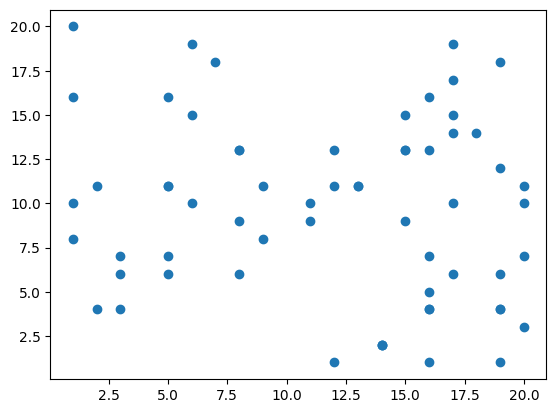

In [112]:
y_pred = regr_tree.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

In [113]:
print('R2', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 -1.0333971420296821
MAE 6.82258064516129
RMSE 8.65373311202706
MAPE 1.415822571959594


### Далее - трансформация переменных, генерация новых переменных, подбор гиперпараметров и попыки повышения качества модели